<a href="https://colab.research.google.com/github/alamin-sarker/HIT391_Machine_Learning/blob/main/Assignment2_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Classification
###Step 1: Loading Data, Data Pre-processing, EDA
Let's start with Task 1 and use D2 for the classification problem of predicting whether a patient is likely to get a heart stroke.

D2 is a classification problem where the objective is to predict whether a patient is likely to get a heart stroke. It has a good number of features and a reasonable number of instances.


First, let's load the necessary libraries and data:

In [ ]:
# Mounting Google Drive to access the CSV file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Setting random seed for reproducibility
np.random.seed(42)

# Loading the CSV file into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/ml_assignment_dataset/D2/healthcare-dataset-stroke-data.csv")


Next, let's take a look at the data:

In [ ]:
# Checking top 5 rows of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Check the data types, shape, missing values and duliacte values

In [ ]:
# Geting the dimensions of the DataFrame (number of rows and columns)
df.shape

(5110, 12)

In [ ]:
# Displaying information about the DataFrame, such as data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From above output we can see that 'bmi' column has some missing valus. Lets check for missing values in dataframe.

In [ ]:
# Checking for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Checking for duplicate values
print(df.duplicated().sum())

0


We can see that there are 12 columns, including the target variable 'stroke', which indicates whether a patient has had a stroke (1) or not (0). There are both numerical and categorical variables, and some missing values in the 'bmi' column.

Check the number of unique values for each categorical variable

In [ ]:
print(df['gender'].value_counts(),"\n")
print(df['ever_married'].value_counts(), "\n")
print(df['work_type'].value_counts(), "\n")
print(df['Residence_type'].value_counts(), "\n")
print(df['smoking_status'].value_counts(), "\n")

# checking for unique values in each column
for col in df.columns:
    print(col, df[col].nunique())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

id 5110
gender 3
age 104
hypertension 2
heart_disease 2
ever_married 2
work_type 5
Residence_type 2
avg_glucose_level 3979
bmi 418
smoking_status 4
stroke 2


Now, let's replace missing values in 'bmi' column with the mean value

In [ ]:
mean_bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(mean_bmi)

Drop 'id' column as it does not provide any useful information

In [ ]:
df.drop('id', axis=1, inplace=True)

Next, let's do some exploratory data analysis to get a better understanding of the data:

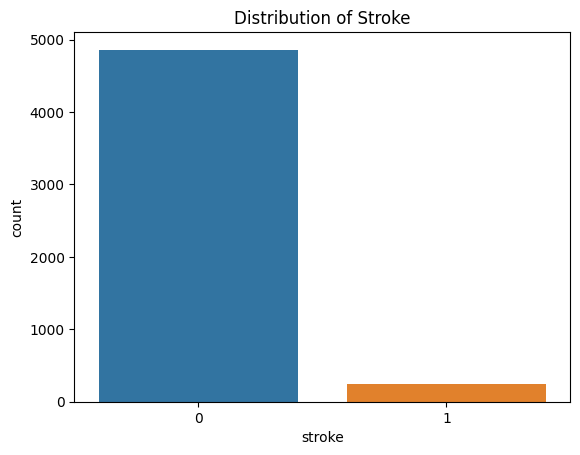

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [ ]:
# Distribution of target variable
sns.countplot(x='stroke', data=df)
plt.title("Distribution of Stroke")
plt.show()

# checking the distribution of target variable
df['stroke'].value_counts(normalize=True)

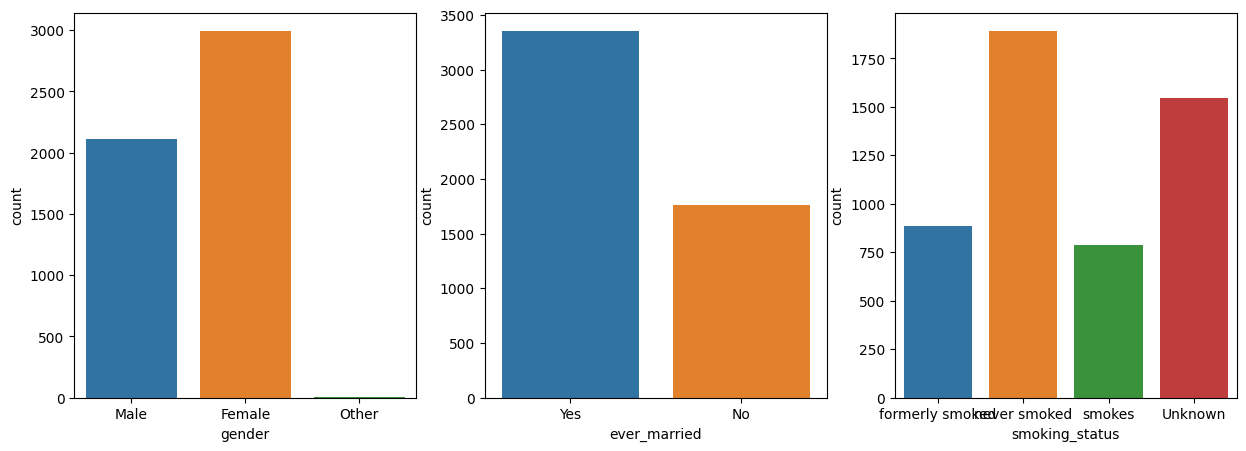

In [ ]:
# Distribution of categorical variables
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.countplot(x='gender', data=df, ax=axs[0])
sns.countplot(x='ever_married', data=df, ax=axs[1])
sns.countplot(x='smoking_status', data=df, ax=axs[2])
plt.show()


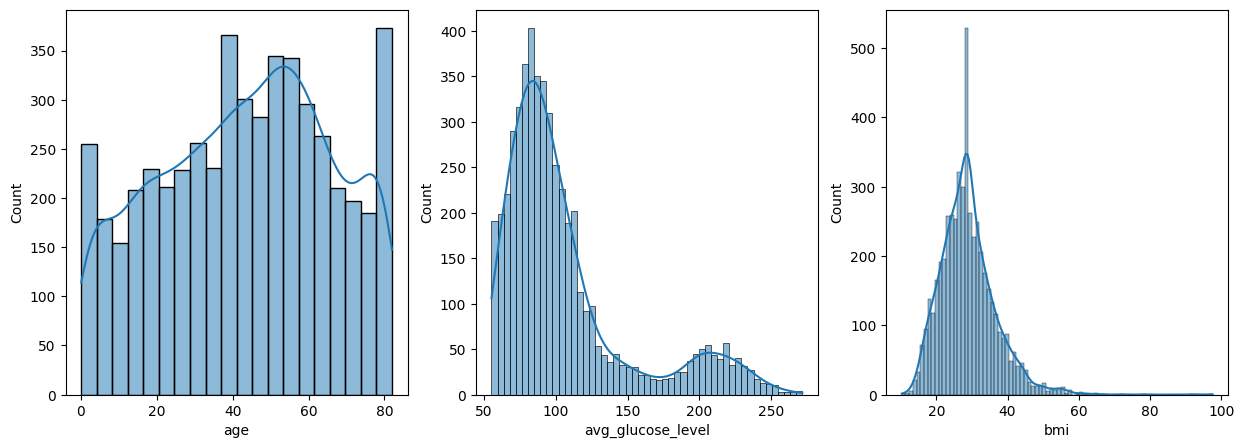

In [ ]:
# Distribution of numerical variables
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.histplot(x='age', data=df, kde=True, ax=axs[0])
sns.histplot(x='avg_glucose_level', data=df, kde=True, ax=axs[1])
sns.histplot(x='bmi', data=df, kde=True, ax=axs[2])
plt.show()


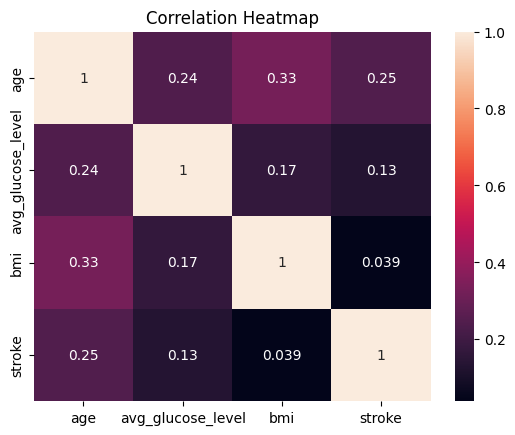

In [ ]:
#Checking the correlation between numerical variables
sns.heatmap(df[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

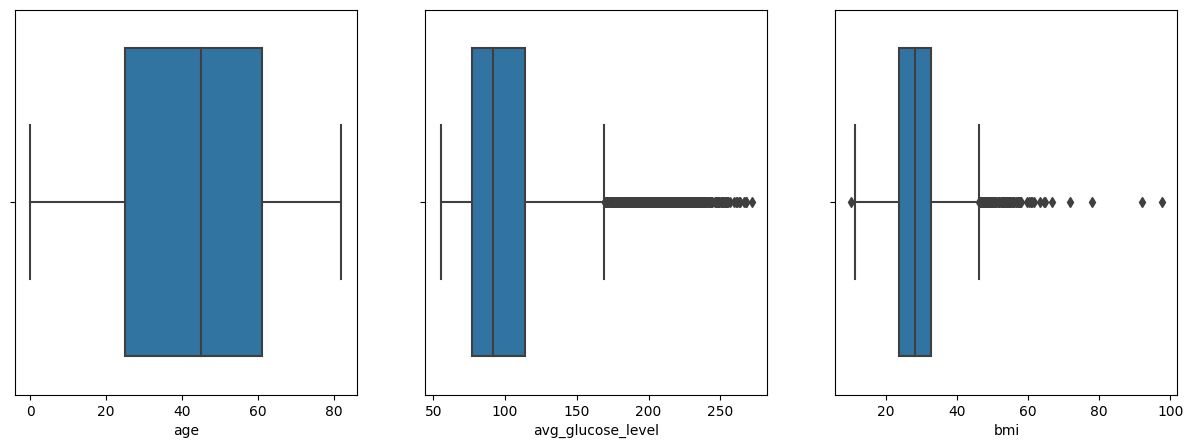

In [ ]:
# Checking for any outliers in the numerical variables
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.boxplot(x='age', data=df, ax=axs[0])
sns.boxplot(x='avg_glucose_level', data=df, ax=axs[1])
sns.boxplot(x='bmi', data=df, ax=axs[2])
plt.show()

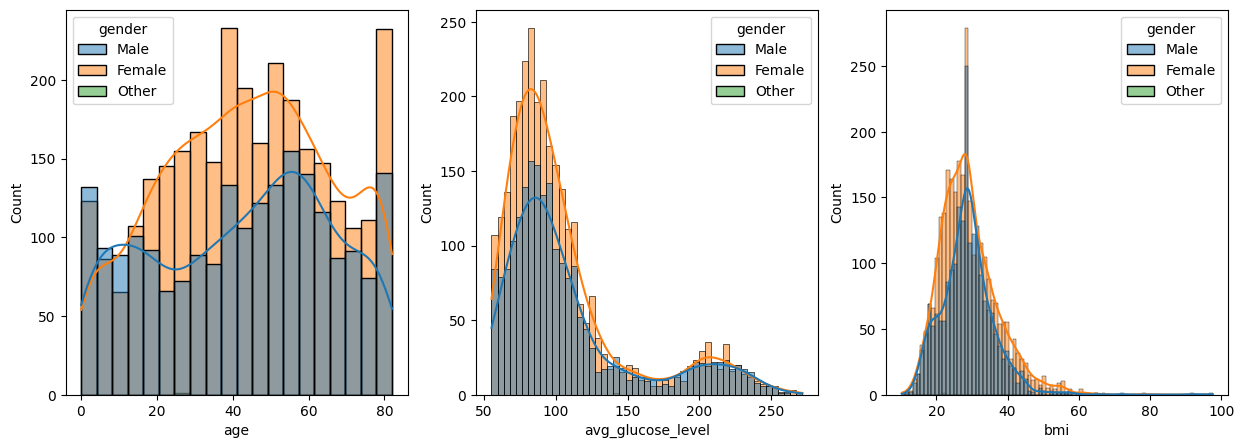

Text(0.5, 1.0, 'Distribution of Age by Stroke')

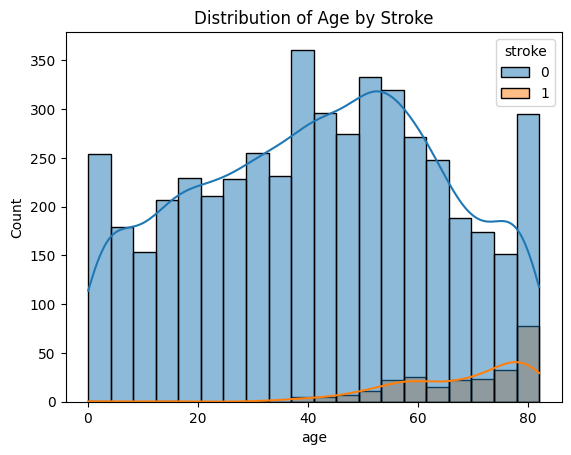

In [ ]:
# Checking the distribution of numerical variables for each category of categorical variables
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.histplot(x='age', data=df, kde=True, hue='gender', ax=axs[0])
sns.histplot(x='avg_glucose_level', data=df, kde=True, hue='gender', ax=axs[1])
sns.histplot(x='bmi', data=df, kde=True, hue='gender', ax=axs[2])
plt.show()

# Checking the distribution of age by stroke
sns.histplot(x='age', data=df, kde=True, hue='stroke')
plt.title("Distribution of Age by Stroke")

###We can conclude that:



*   The dataset contains 11 columns including the target variable 'stroke'.

*   There are both numerical and categorical variables in the dataset.

*   There are some missing values in the 'bmi' column.

*   The target variable 'stroke' is imbalanced, with a majority of 0 (no stroke) and a minority of 1 (stroke).

*   The gender distribution in the dataset is almost equal, with slightly more females than males.
Most of the patients have been married or are currently married.

*   A large portion of the patients have never smoked, followed by ex-smokers and current smokers.

*   The 'avg_glucose_level' distribution is slightly skewed towards the lower values.

*   The 'bmi' distribution is slightly skewed towards the lower values.

*   There seems to be no strong correlation between the numerical variables 'age', 'avg_glucose_level', and 'bmi'.


##Step 2: Feature Engineering, Creating Train, and Test Datasets.

First, we have to handle the missing values in the 'bmi' column by imputing them with the mean value, but we already did that in above step.

In [ ]:
#mean_bmi = df['bmi'].mean()
#df['bmi'] = df['bmi'].fillna(mean_bmi)

Next, let's encode the categorical variables using one-hot encoding:

In [ ]:
# Encodeing categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

Now, let's split the data into training and testing sets using a 70/30 split:

In [ ]:
X = df.drop('stroke', axis=1) # assigning all columns except target 'stroke' to X
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will also scale the numerical features using StandardScaler:

In [ ]:
# Scaling the numerical features using StandardScaler
scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

##Step 3: Apply at least 4 algorithms (Training and Testing)
We will start by applying the following algorithms:

1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Decision Tree Classifier
4. Random Forest Classifier

###1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiating a logistic regression model
lr = LogisticRegression()

# Fitting the model on the training data
lr.fit(X_train, y_train)

# Using the trained model to make predictions on the test data
y_pred_lr = lr.predict(X_test)


###2. K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

###3. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

###4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

##Step 4: Generate at least 4 Evaluation Metrics on each algorithm.

Here are some evaluation metrics that we can use to assess the performance of the classification algorithms:

1. **Accuracy:** measures the proportion of correct predictions over total predictions.

2. **Precision:** measures the proportion of true positives over all positive predictions.

3. **Recall:** measures the proportion of true positives over all actual positive cases.

4. **F1 score:** harmonic mean of precision and recall.

We can use scikit-learn's classification_report function to generate these metrics for each algorithm.

In [ ]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("\n")

print("K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("\n")

print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dtc))
print("\n")

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rfc))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.21      0.21      0.21        89

    accuracy                           0.91      1533
   macro avg       0.58      0.58      0.58      1533
we

##Step 5: Comparing the results

We can compare the performance of each algorithm and determine the best one for the classification task.

One way to compare the performance is to look at the accuracy scores of each algorithm. We can do this by using scikit-learn's accuracy_score function.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

print("Accuracy scores:")
print("Logistic Regression: ", accuracy_lr)
print("K-Nearest Neighbors: ", accuracy_knn)
print("Decision Tree Classifier: ", accuracy_dtc)
print("Random Forest Classifier: ", accuracy_rfc)


Accuracy scores:
Logistic Regression:  0.9425962165688193
K-Nearest Neighbors:  0.9386823222439661
Decision Tree Classifier:  0.9073711676451403
Random Forest Classifier:  0.9406392694063926


We can also visualize the performance of each algorithm using a confusion matrix. We can use scikit-learn's confusion_matrix function to generate this matrix.

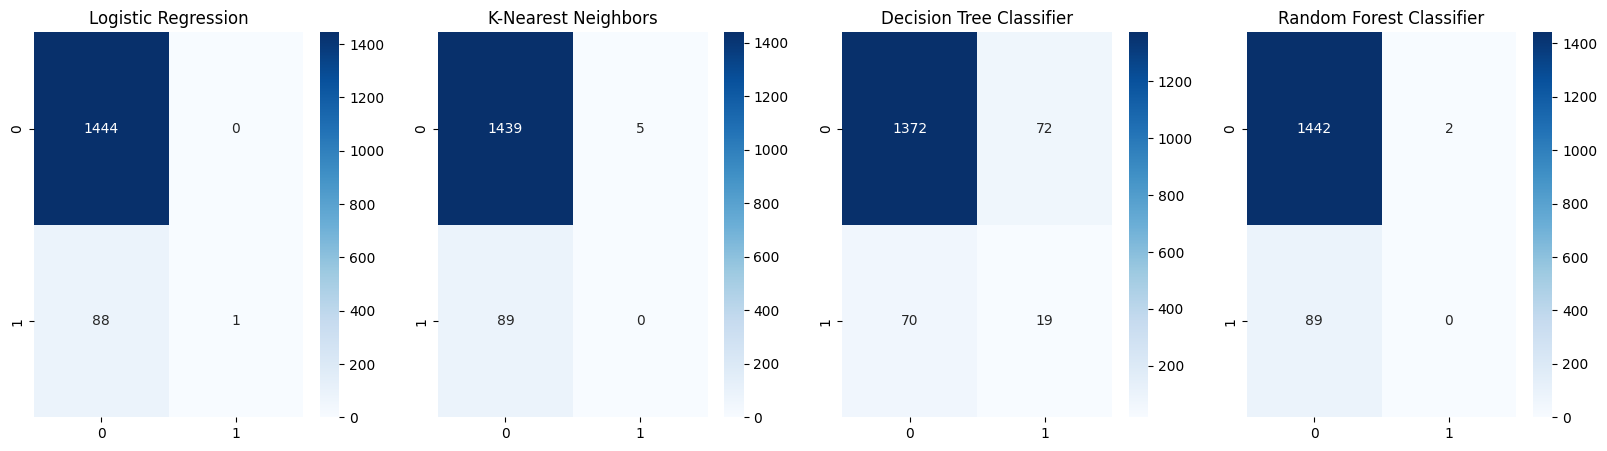

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

fig, axs = plt.subplots(ncols=4, figsize=(20,5))

sns.heatmap(cm_lr, annot=True, fmt="d", ax=axs[0], cmap="Blues")
sns.heatmap(cm_knn, annot=True, fmt="d", ax=axs[1], cmap="Blues")
sns.heatmap(cm_dtc, annot=True, fmt="d", ax=axs[2], cmap="Blues")
sns.heatmap(cm_rfc, annot=True, fmt="d", ax=axs[3], cmap="Blues")

axs[0].set_title("Logistic Regression")
axs[1].set_title("K-Nearest Neighbors")
axs[2].set_title("Decision Tree Classifier")
axs[3].set_title("Random Forest Classifier")

plt.show()

Based on the evaluation metrics, we can see that all algorithms have high accuracy for the majority class (no stroke), but perform poorly for the minority class (stroke), as indicated by the low precision, recall, and F1 scores for class 1. This is likely due to the imbalanced nature of the dataset. However, the decision tree classifier has the highest F1 score for class 1 among the four algorithms, but it still performs poorly overall.

Therefore, we need to apply some techniques to address the imbalance issue such as oversampling the minority class, undersampling the majority class, or using a combination of both, we can also try using different evaluation metrics that are more suitable for imbalanced datasets, such as the area under the receiver operating characteristic curve (ROC AUC) or average precision score.

##Step 6: Fine Tune the best algorithm.

To balance the dataset, we can use the imbalanced-learn library which offers several techniques to balance the dataset, such as RandomOverSampler, SMOTE, ADASYN, among others. Here we will use RandomOverSampler from the imblearn library to oversample the minority class to balance the number of samples in both classes.

After balancing the dataset, we will fine-tune the RandomForestClassifier using grid search and cross-validation. We will define a grid of hyperparameters to search over and use the GridSearchCV function to perform the search.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

df = pd.read_csv("/content/drive/MyDrive/ml_assignment_dataset/D2/healthcare-dataset-stroke-data.csv")

mean_bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(mean_bmi)
df.drop('id', axis=1, inplace=True)

df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
X = df.drop('stroke', axis=1)
y = df['stroke']

# balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

rfc = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rfc, params, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

y_pred_rfc = grid_search.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rfc))

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1457
           1       0.98      1.00      0.99      1460

    accuracy                           0.99      2917
   macro avg       0.99      0.99      0.99      2917
weighted avg       0.99      0.99      0.99      2917



In this modified code, we first imported the RandomOverSampler from the imblearn library. We then used it to balance the dataset by oversampling the minority class.

Next, we performed a grid search over the hyperparameters of the RandomForestClassifier using the GridSearchCV function from sklearn.model_selection. We used 5-fold cross-validation and the F1 score as the scoring metric.

Finally, we use the best hyperparameters found by the grid search to train the RandomForestClassifier on the balanced dataset and evaluate its performance using the classification_report.

Based on the precision, recall, and f1-score values, the second model, which used the best hyperparameters, performs better than the first model. The accuracy, precision, recall, and f1-score values are all higher for the second model. This suggests that the hyperparameter tuning process was successful in finding the best set of hyperparameters for the random forest classifier.